In [1]:
import matplotlib.pyplot as plt
import tiktoken
import pandas as pd

In [2]:
INPUT_DATA_PATH = 'data/kradeze_pripady.xlsx'
SYSTEM_PROMPT_PATH = 'data/system_prompt.txt'
SHEET_IDX = 1
MODEL = 'gpt-3.5-turbo'

In [3]:
encoding = tiktoken.encoding_for_model(MODEL)

In [4]:
df = pd.read_excel(INPUT_DATA_PATH)

In [5]:
df['Length (tiktoken)'] = df["plny_skutek"].apply(lambda x: len(encoding.encode(x)))

In [6]:
print(df['Podvarianta'].unique())
print(df['Podvarianta'].unique().size)

['Nahodilé_příležitostně' 'pro_získání_prostředků'
 'spíše_pro_přímou_spotřebu' 'naskytla_se_příležitost'
 'se_způsobením_problémů' 'množství_přesahující_osobní_spotřebu'
 'bez_překonání_zámku' 'systematické_vyvádění' 'Systematické'
 's_překonáním_zámku' 'v_interiéru' nan 'plánovaně' 'kratší než 3 měsíce'
 'delší než 3 měsíce' 'v_exteriéru' 'bez_větších_problémů'
 'pro_vlastní_spotřebu']
18


In [7]:
df

,Varianta,Podvarianta,Okolnost,ID_slt,plny_skutek,Length (tiktoken)
0,Krádež_v_práci,Nahodilé_příležitostně,NaN,31751427,"Dne 3.1.2017 v době kolem 13:00 hodin v XXX, k...",141
1,Krádež_v_obchodě,pro_získání_prostředků,NaN,31757383,v Brně v OD Tesco v nákupim centru Královo pol...,156
2,Krádež_v_obchodě,spíše_pro_přímou_spotřebu,NaN,31758225,Obviněný v silně podnapilém stavu v prodejně A...,108
3,Krádež_v_obchodě,pro_získání_prostředků,NaN,31781675,v době od 10:30 do 11:30 hodin dne 2. března 2...,1109
4,Krádež_na_návštěvě,naskytla_se_příležitost,NaN,32052032,v hotelu využil zřejmě neuzamčených vstupních ...,218
...,...,...,...,...,...,...
780,Vloupání_do_jiného_objektu,množství_přesahující_osobní_spotřebu,skupinově\nponičení při vstupu,33588849,obžalovaní společně:\nv době od 1.00 hodin do ...,151
781,Krádež_v_obchodě,pro_získání_prostředků,skupinově\n2-4 obdobných útoků,33657041,společně s další obviněnou\nad 1) po předchozí...,469
782,Krádež_v_práci,Nahodilé_příležitostně,skupinově,34097447,dne 3.9.2017 v době od 18:00 hodin do 24:00 ho...,230
783,Krádež_z_volně_příst_místa,v_exteriéru,skupinově\n2-4 obdobných útoků,34194252,1/ v blíže nezjištěné době počátku roku 2016 d...,484


(array([301.,  53.,  16., 174.,  27.,  31.,  67.,  28.,  42.,  46.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

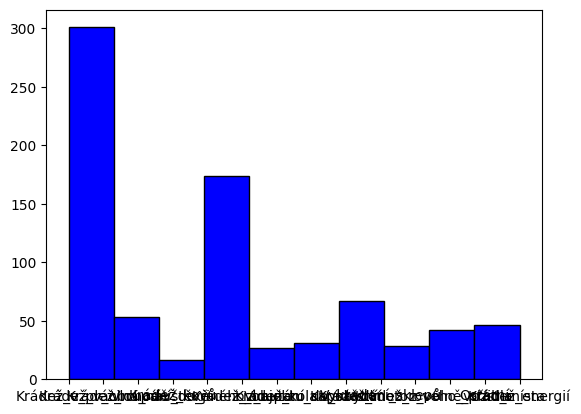

In [28]:
plt.hist(df['Varianta'], color='blue', edgecolor='black')

In [53]:
translation_dict = {
    "Krádež_kovů": "Theft of metals",
    "Krádež_v_obchodě": "Theft in a shop",
    "Vloupání_do_jiného_objektu": "Break. into another obj.",
    "Kapsářství": "Pickpocketing",
    "Krádež_z_volně_příst_místa": "Open-access place theft",
    "Krádež_kola": "Bicycle theft",
    "Krádež_na_návštěvě": "Theft during a visit",
    "Vloupání_do_obydlí": "Break. into a residence",
    "Krádež_z_auta": "Theft from a car",
    "Vykradení_sklepů": "Robbing of cellars",
    "Ostatní": "Others",
    "Krádež_v_práci": "Theft at work",
    "Krádež_energií": "Theft of energy",
    "Krádež_motorového_vozidla": "Theft of motor vehicles"
}
df['Varianta_EN'] = df["Varianta"].apply(lambda x: translation_dict[x])

In [54]:
df['Varianta_EN'].value_counts()

Varianta_EN
Theft in a shop             228
Break. into another obj.    137
Theft at work                73
Pickpocketing                60
Theft during a visit         53
Open-access place theft      42
Theft from a car             37
Break. into a residence      31
Theft of motor vehicles      28
Bicycle theft                27
Others                       26
Theft of energy              20
Theft of metals              16
Robbing of cellars            7
Name: count, dtype: int64

In [81]:
(137) / 785

0.17452229299363056

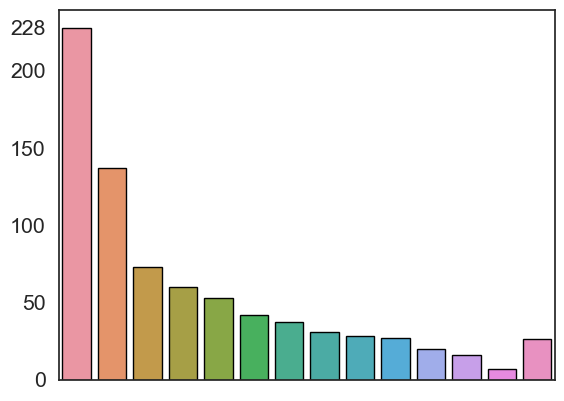

In [78]:
import seaborn as sns

sns.set(font_scale=1.4, style="white")
# sns.set_theme(style="white")
sns.set_context(rc = {'patch.linewidth': 1.0, 'edgecolor': 'black'})
ax = sns.countplot(x='Varianta_EN', # hue='Varianta_EN',
                   order=['Theft in a shop', 'Break. into another obj.', 'Theft at work', 'Pickpocketing',
                          'Theft during a visit', 'Open-access place theft', 'Theft from a car',
                          'Break. into a residence', 'Theft of motor vehicles', 'Bicycle theft',
                          'Theft of energy', 'Theft of metals', 'Robbing of cellars', 'Others'], 
                #    hue_order=['Theft in a shop', 'Break. into another obj.', 'Theft at work', 'Pickpocketing',
                #               'Theft during a visit', 'Open-access place theft', 'Theft from a car',
                #               'Break. into a residence', 'Theft of motor vehicles', 'Bicycle theft',
                #               'Theft of energy', 'Theft of metals', 'Robbing of cellars', 'Others'],
                   data=df, **{'edgecolor': 'black'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([0, 50, 100, 150, 200, 228])

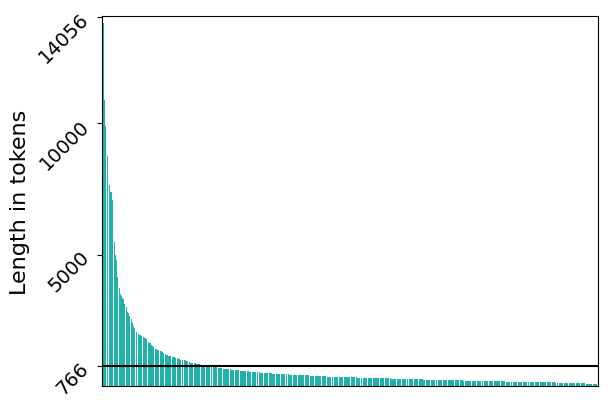

In [27]:
plt.bar(
    range(df['Length (tiktoken)'].size),
    df['Length (tiktoken)'].sort_values(ascending=False),
    color='lightseagreen'
)
plt.xticks(ticks=[])
plt.yticks(ticks=[765.63, 5000, 10000, 14056], rotation=45, fontsize=14)
plt.xlim(-1, 786)
plt.ylim(0, df['Length (tiktoken)'].max() + 10)
plt.ylabel('Length in tokens', fontsize=16)
plt.axhline(y=765.63, color='black', linestyle='-')

In [11]:
df['Length (tiktoken)'].describe()

count      785.000000
mean       765.630573
std       1474.387638
min         56.000000
25%        197.000000
50%        330.000000
75%        647.000000
max      14056.000000
Name: Length (tiktoken), dtype: float64

In [55]:
with open(SYSTEM_PROMPT_PATH) as f:
    system_prompt = f.read()
    
print(f'System prompt length: {len(encoding.encode(system_prompt))}')

System prompt length: 2958
